In [1]:
import numpy as np
import pandas as pd
#
sessions = pd.read_csv('./data/sessions.csv')

In [2]:
sessions['secs_elapsed'] = sessions['secs_elapsed'].fillna(0.0)
sessions = sessions.fillna('nan')
sessions_grouped = sessions.groupby(['user_id'])

In [5]:
var = np.var(sessions['secs_elapsed'])
mean = np.mean(sessions['secs_elapsed'])
sessions['secs_elapsed'] = (sessions['secs_elapsed'] - mean) / var
    

In [6]:
action_type = np.unique(sessions['action_type'].fillna('nan'), return_counts=True)
action = np.unique(sessions['action'].fillna('nan'), return_counts=True)
action_detail = np.unique(sessions['action_detail'].fillna('nan'), return_counts=True)
devices = np.unique(sessions['device_type'].fillna('nan'), return_counts=True)

In [7]:
action_deleted_rare = action[0][np.where(action[1] > 50)]

In [8]:
def get_one_hot_representation(categories, add_other=False):
    if add_other:
        categories = np.concatenate((categories, ['OTHER']))
    return dict(zip(categories, list(range(len(categories)))))

In [9]:
one_hot_representations_sessions = {'action': get_one_hot_representation(action_deleted_rare, add_other=True), 
                                  'action_type': get_one_hot_representation(action_type[0]),
                                  'action_detail': get_one_hot_representation(action_detail[0]),
                                  'device_type': get_one_hot_representation(devices[0])}

In [10]:
users = pd.read_csv('./data/train_users_2.csv')

In [11]:
gender = np.unique(users['gender'])[1:]
signup_method = np.unique(users['signup_method'])
signup_flow = np.unique(users['signup_flow'])
affiliate_channel = np.unique(users['affiliate_channel'])
affiliate_provider = np.unique(users['affiliate_provider'])
language = np.unique(users['language'])
first_affiliate_tracked = np.unique(users['first_affiliate_tracked'].fillna('nan'))
signup_app = np.unique(users['signup_app'])
first_device_type = np.unique(users['first_device_type'])
first_browser, counts_first_browser = np.unique(users['first_browser'], return_counts=True)
first_browser = first_browser[np.where(counts_first_browser > 50)[0]]

In [12]:
one_hot_representation = {
    4: get_one_hot_representation(gender),
    6: get_one_hot_representation(signup_method),
    7: get_one_hot_representation(signup_flow),
    8: get_one_hot_representation(language),
    9: get_one_hot_representation(affiliate_channel),
    10: get_one_hot_representation(affiliate_provider),
    11: get_one_hot_representation(first_affiliate_tracked),
    12: get_one_hot_representation(signup_app),
    13: get_one_hot_representation(first_device_type),
    14: get_one_hot_representation(first_browser, add_other=True),
}

In [18]:
import importlib
from tqdm import tqdm

import data_process_lstm
importlib.reload(data_process_lstm)
nb = 0
max_len = 0
for user in tqdm(users.fillna('nan').values):
    try:
        sessions_user = sessions_grouped.get_group(user[0])
        l = len(sessions_user)
        if l > max_len:
            max_len = l
        if nb == 0:
            u = data_process_lstm.data_processing_by_user_lstm(user, sessions_user, one_hot_representation, one_hot_representations_sessions)
            d = np.array(u.features).shape
        nb = nb + 1
    except KeyError:
        continue

100%|██████████| 213451/213451 [00:28<00:00, 7498.09it/s]  


In [19]:
print(nb, d, max_len)

73815 (127, 585) 2644


In [15]:
import importlib
from tqdm import tqdm

import data_process_lstm
importlib.reload(data_process_lstm)
preprocessed_users = np.zeros((nb, d[1]))
labels = []
index = []
z = 0
for user in tqdm(users.fillna('nan').values):
    try:
        sessions_user = sessions_grouped.get_group(user[0])
        l = len(sessions_user)
        u = data_process_lstm.data_processing_by_user_lstm(user, sessions_user, one_hot_representation, one_hot_representations_sessions)
        if not np.isfinite(u.features).all():
            print(user[0])
            break
        #print(len(features))
        labels.append(user[-1])
        preprocessed_users[z:l] = u.features
        index.append(z)
        z = z + l
    except KeyError:
        continue
        #u = data_processing_user.data_processing_by_user(user, [], one_hot_representation, one_hot_representations_sessions)
        #preprocessed_users.append(u.features)

MemoryError: 

In [18]:
print(nb)

5537957


In [62]:
preprocesses_users = []
labels = []
index = []

In [64]:
var = np.var(times)
mu = np.mean(times)
times = (times - mu) / var

In [58]:
np.min(times)

-1.0

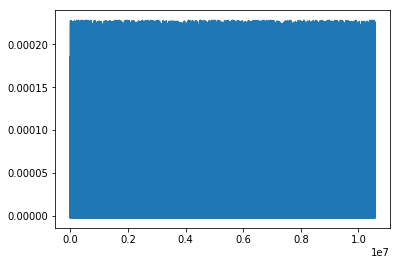

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

plt.show()

In [23]:
print(len(users_session[0]), len(users_session[1]))
print(len(sessions))

135484 135484
10567737
